In [2]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.0 MB/s eta 0:00:00


In [18]:
from Bio import SeqIO
from collections import Counter
import pandas as pd
import numpy as np

def DNA_Analyzer(GB_file_path):
    # بارگذاری دنباله از فایل GenBank
    record = SeqIO.read(GB_file_path, "genbank")
    dna_sequence = str(record.seq).upper()

    if len(dna_sequence) < 2000:
        raise ValueError(".طول دنباله دی‌ان‌ای باید حداقل 2000 نوکلئوتید باشد")

    # شمارش نوکلئوتیدهای ساده
    nucleotides = ['A', 'T', 'C', 'G']
    simple_counts = Counter(dna_sequence)
    simple_percentages = {nuc: simple_counts.get(nuc, 0) / len(dna_sequence) * 100 for nuc in nucleotides}

    # جدول نوکلئوتیدهای ساده به فرم ماتریس
    simple_matrix = pd.DataFrame({
        'in bps': [simple_counts.get(nuc, 0) for nuc in nucleotides],
        'in %': [simple_percentages.get(nuc, 0) for nuc in nucleotides]
    }, index=nucleotides)

    # شمارش دی‌نوکلئوتیدها
    di_nucleotides = [dna_sequence[i:i+2] for i in range(len(dna_sequence) - 1)]
    di_counts = Counter(di_nucleotides)
    di_percentages = {dinuc: di_counts[dinuc] / len(di_nucleotides) * 100 for dinuc in di_counts}

    # جدول دی‌نوکلئوتیدها به فرم ماتریس
    di_matrix_bps = pd.DataFrame(0, index=nucleotides, columns=nucleotides)
    di_matrix_percentage = pd.DataFrame(0.0, index=nucleotides, columns=nucleotides)

    for dinuc, count in di_counts.items():
        row, col = dinuc[0], dinuc[1]
        di_matrix_bps.loc[row, col] = count
        di_matrix_percentage.loc[row, col] = di_percentages[dinuc]

    # شمارش تری‌نوکلئوتیدها
    tri_nucleotides = [dna_sequence[i:i+3] for i in range(len(dna_sequence) - 2)]
    tri_counts = Counter(tri_nucleotides)
    tri_percentages = {trinuc: tri_counts[trinuc] / len(tri_nucleotides) * 100 for trinuc in tri_counts}

    # جدول تری‌نوکلئوتیدها به فرم ماتریس
    tri_matrix_bps = pd.DataFrame(0, index=nucleotides, columns=[n1+n2 for n1 in nucleotides for n2 in nucleotides])
    tri_matrix_percentage = pd.DataFrame(0.0, index=nucleotides, columns=[n1+n2 for n1 in nucleotides for n2 in nucleotides])

    for trinuc, count in tri_counts.items():
        row, col = trinuc[0], trinuc[1:]
        tri_matrix_bps.loc[row, col] = count
        tri_matrix_percentage.loc[row, col] = tri_percentages[trinuc]

    # محاسبه GC
    gc_content = (simple_counts.get('G', 0) + simple_counts.get('C', 0)) / len(dna_sequence) * 100

    return simple_matrix, di_matrix_bps, di_matrix_percentage, tri_matrix_bps, tri_matrix_percentage, gc_content

# استفاده از تابع
GB_file_path = "sequence.gb"
simple_matrix, di_matrix_bps, di_matrix_percentage, tri_matrix_bps, tri_matrix_percentage, gc_content = DNA_Analyzer(GB_file_path)

# نمایش نتایج
print("\n Mono-Nucleotides:")
print(simple_matrix)

print("\n Di-Nucleotides (in bps):")
print(di_matrix_bps)

print("\n Di-Nucleotides (in %)")
print(di_matrix_percentage)

print("\n Tri-Nucleotide (in bps):")
print(tri_matrix_bps)

print("\n Tri-Nucleotide (in %):")
print(tri_matrix_percentage)

print(f"\n Percentage of GC: {gc_content:.2f}%")



 Mono-Nucleotides:
   in bps       in %
A    5679  33.107911
T    5047  29.423424
C    4182  24.380575
G    2245  13.088090

 Di-Nucleotides (in bps):
      A     T     C    G
A  1768  1691  1379  841
T  1842  1479  1133  593
C  1397  1288  1108  388
G   672   589   562  422

 Di-Nucleotides (in %)
           A         T         C         G
A  10.307836  9.858909  8.039879  4.903218
T  10.739272  8.622901  6.605644  3.457323
C   8.144823  7.509328  6.459888  2.262127
G   3.917910  3.434002  3.276586  2.460354

 Tri-Nucleotide (in bps):
    AA   AT   AC   AG   TA   TT   TC   TG   CA   CT   CC   CG   GA   GT   GC  \
A  543  556  431  238  518  575  384  214  486  417  315  161  189  213  266   
T  553  579  422  288  551  383  369  176  369  375  294   94  234  134  118   
C  435  411  366  185  524  360  268  136  333  347  325  103  117  134   79   
G  237  145  160  130  249  161  112   67  209  149  174   30  132  107   99   

    GG  
A  173  
T  107  
C   58  
G   84  

 Tri-Nucle

In [19]:
from Bio import SeqIO
from collections import Counter
import pandas as pd
import numpy as np

def DNA_Analyzer(GB_file_path):
    # بارگذاری دنباله از فایل GenBank
    record = SeqIO.read(GB_file_path, "genbank")
    dna_sequence = str(record.seq).upper()

    if len(dna_sequence) < 2000:
        raise ValueError(".طول دنباله دی‌ان‌ای باید حداقل 2000 نوکلئوتید باشد")

    # شمارش نوکلئوتیدهای ساده
    nucleotides = ['A', 'T', 'C', 'G']
    simple_counts = Counter(dna_sequence)
    simple_percentages = {nuc: simple_counts.get(nuc, 0) / len(dna_sequence) * 100 for nuc in nucleotides}

    # جدول نوکلئوتیدهای ساده به فرم ماتریس
    simple_matrix = pd.DataFrame({
        'bps': [simple_counts.get(nuc, 0) for nuc in nucleotides],
        'Percentage': [simple_percentages.get(nuc, 0) for nuc in nucleotides]
    }, index=nucleotides)

    # شمارش دی‌نوکلئوتیدها
    di_nucleotides = [dna_sequence[i:i+2] for i in range(len(dna_sequence) - 1)]
    di_counts = Counter(di_nucleotides)
    di_percentages = {dinuc: di_counts[dinuc] / len(di_nucleotides) * 100 for dinuc in di_counts}

    # جدول دی‌نوکلئوتیدها به فرم ماتریس
    di_matrix_bps = pd.DataFrame(0, index=nucleotides, columns=nucleotides)
    di_matrix_percentage = pd.DataFrame(0.0, index=nucleotides, columns=nucleotides)

    for dinuc, count in di_counts.items():
        row, col = dinuc[0], dinuc[1]
        di_matrix_bps.loc[row, col] = count
        di_matrix_percentage.loc[row, col] = di_percentages[dinuc]

    # شمارش تری‌نوکلئوتیدها
    tri_nucleotides = [dna_sequence[i:i+3] for i in range(len(dna_sequence) - 2)]
    tri_counts = Counter(tri_nucleotides)
    tri_percentages = {trinuc: tri_counts[trinuc] / len(tri_nucleotides) * 100 for trinuc in tri_counts}

    # جدول تری‌نوکلئوتیدها به فرم ماتریس
    tri_matrix_bps = pd.DataFrame(0, index=nucleotides, columns=[n1+n2 for n1 in nucleotides for n2 in nucleotides])
    tri_matrix_percentage = pd.DataFrame(0.0, index=nucleotides, columns=[n1+n2 for n1 in nucleotides for n2 in nucleotides])

    for trinuc, count in tri_counts.items():
        row, col = trinuc[0], trinuc[1:]
        tri_matrix_bps.loc[row, col] = count
        tri_matrix_percentage.loc[row, col] = tri_percentages[trinuc]

    # محاسبه GC
    gc_content = (simple_counts.get('G', 0) + simple_counts.get('C', 0)) / len(dna_sequence) * 100

    return simple_matrix, di_matrix_bps, di_matrix_percentage, tri_matrix_bps, tri_matrix_percentage, gc_content

# استفاده از تابع
GB_file_path = "sequence.gb"
simple_matrix, di_matrix_bps, di_matrix_percentage, tri_matrix_bps, tri_matrix_percentage, gc_content = DNA_Analyzer(GB_file_path)

# نمایش نتایج با جداول خط کشی شده
print("\nجدول نوکلئوتیدهای ساده (bps درصد و ):")
print(simple_matrix.to_markdown())

print("\nجدول دی‌نوکلئوتیدها (bps):")
print(di_matrix_bps.to_markdown())

print("\nجدول دی‌نوکلئوتیدها (درصد):")
print(di_matrix_percentage.to_markdown())

print("\nجدول تری‌نوکلئوتیدها (bps):")
print(tri_matrix_bps.to_markdown())

print("\nجدول تری‌نوکلئوتیدها (درصد):")
print(tri_matrix_percentage.to_markdown())

print(f"\nدرصد GC: {gc_content:.2f}%")



جدول نوکلئوتیدهای ساده (bps درصد و ):
|    |   bps |   Percentage |
|:---|------:|-------------:|
| A  |  5679 |      33.1079 |
| T  |  5047 |      29.4234 |
| C  |  4182 |      24.3806 |
| G  |  2245 |      13.0881 |

جدول دی‌نوکلئوتیدها (bps):
|    |    A |    T |    C |   G |
|:---|-----:|-----:|-----:|----:|
| A  | 1768 | 1691 | 1379 | 841 |
| T  | 1842 | 1479 | 1133 | 593 |
| C  | 1397 | 1288 | 1108 | 388 |
| G  |  672 |  589 |  562 | 422 |

جدول دی‌نوکلئوتیدها (درصد):
|    |        A |       T |       C |       G |
|:---|---------:|--------:|--------:|--------:|
| A  | 10.3078  | 9.85891 | 8.03988 | 4.90322 |
| T  | 10.7393  | 8.6229  | 6.60564 | 3.45732 |
| C  |  8.14482 | 7.50933 | 6.45989 | 2.26213 |
| G  |  3.91791 | 3.434   | 3.27659 | 2.46035 |

جدول تری‌نوکلئوتیدها (bps):
|    |   AA |   AT |   AC |   AG |   TA |   TT |   TC |   TG |   CA |   CT |   CC |   CG |   GA |   GT |   GC |   GG |
|:---|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-

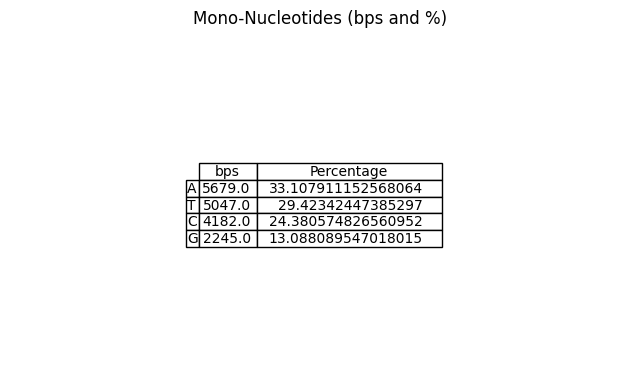

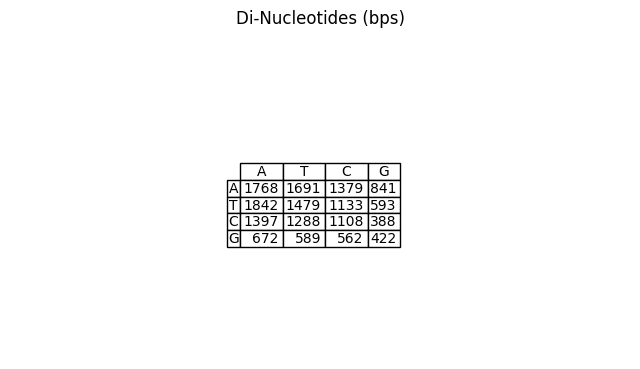

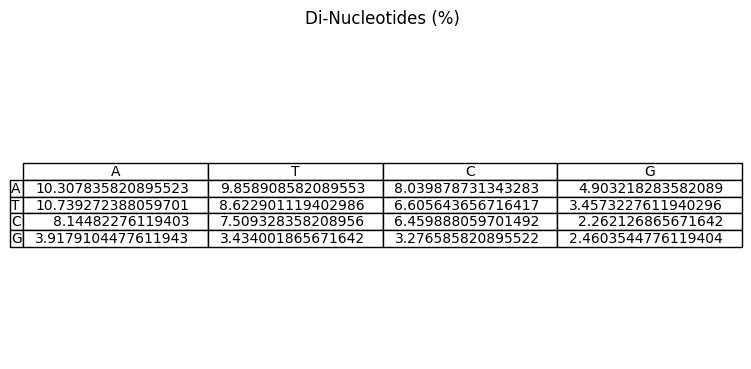

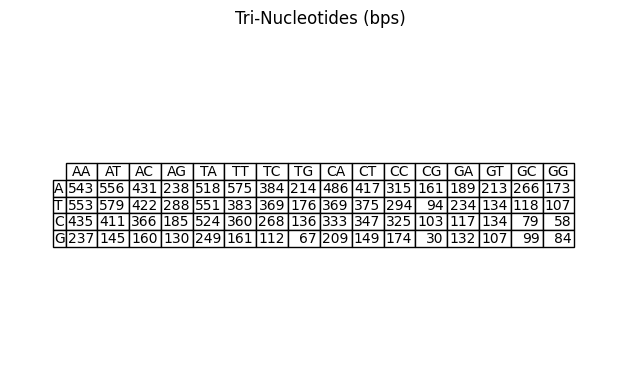

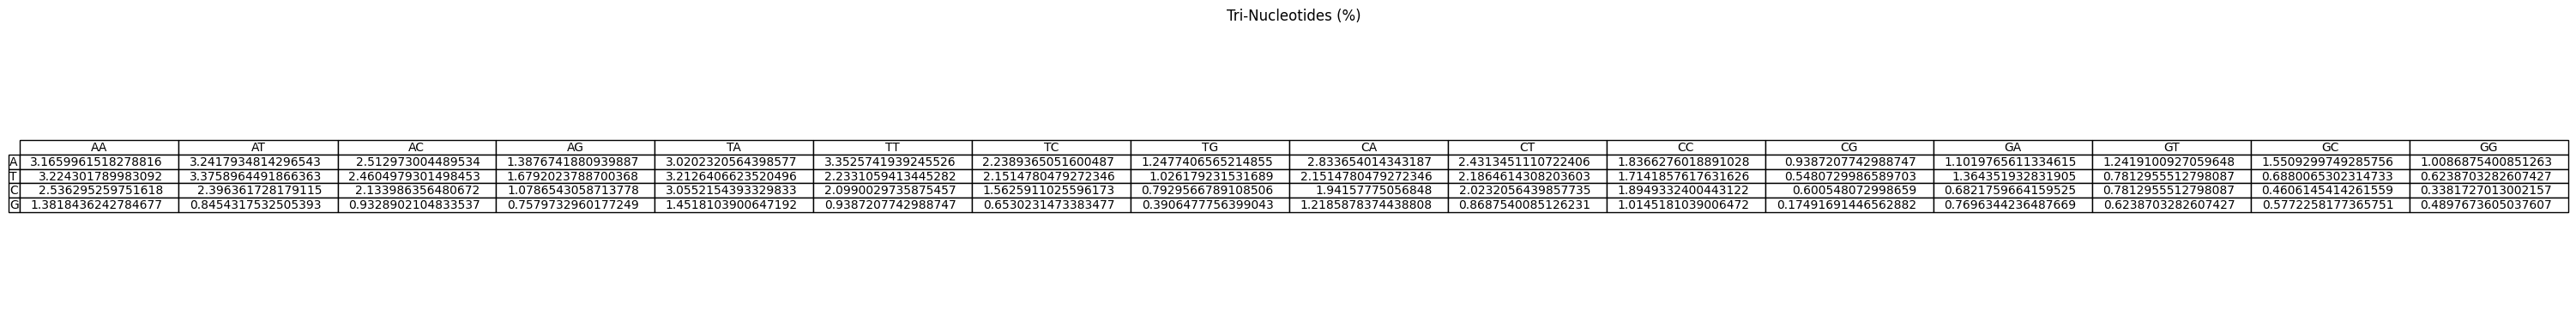

In [10]:
import matplotlib.pyplot as plt

def plot_table(data, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=data.values, colLabels=data.columns, rowLabels=data.index, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(data.columns))))
    plt.title(title, pad=20)
    plt.show()

# نمایش گرافیکی
plot_table(simple_matrix, "Mono-Nucleotides (bps and %)")

plot_table(di_matrix_bps, "Di-Nucleotides (bps)")
plot_table(di_matrix_percentage, "Di-Nucleotides (%)")

plot_table(tri_matrix_bps, "Tri-Nucleotides (bps)")
plot_table(tri_matrix_percentage, "Tri-Nucleotides (%)")


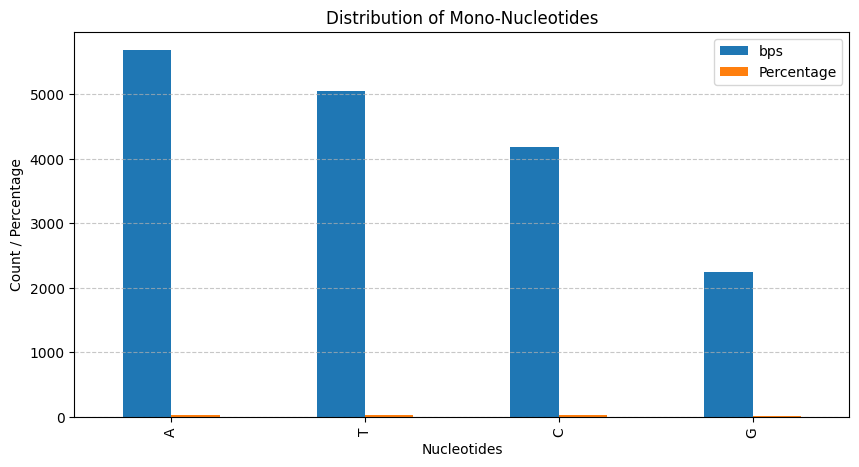

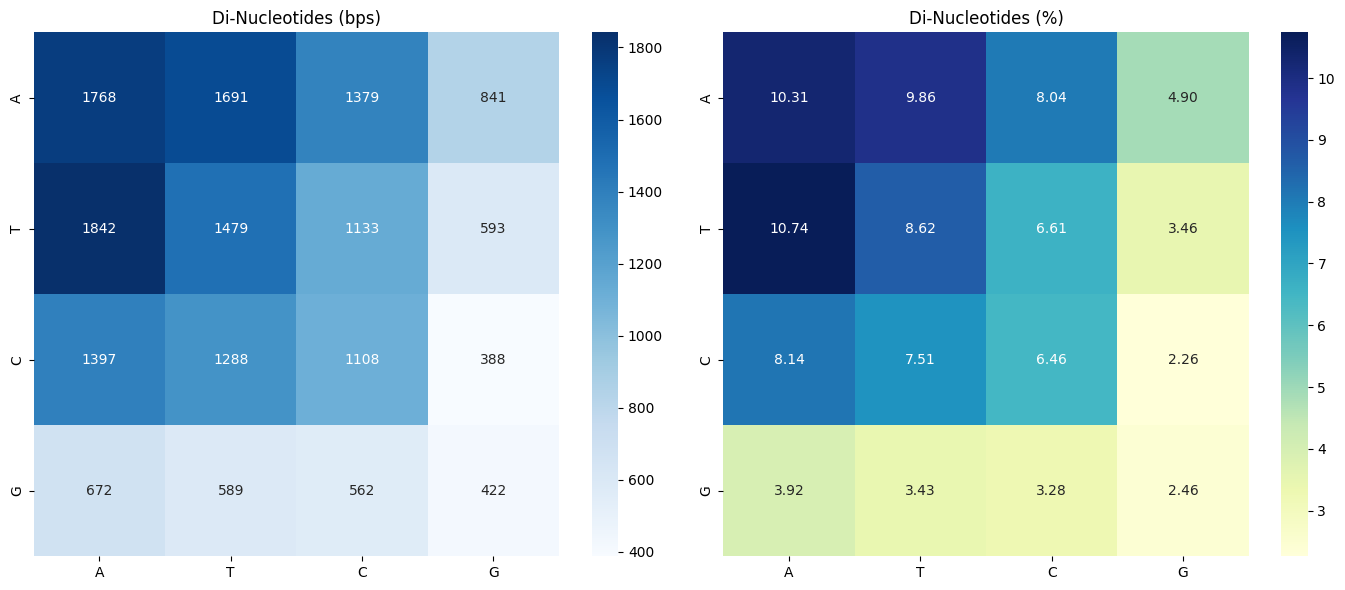

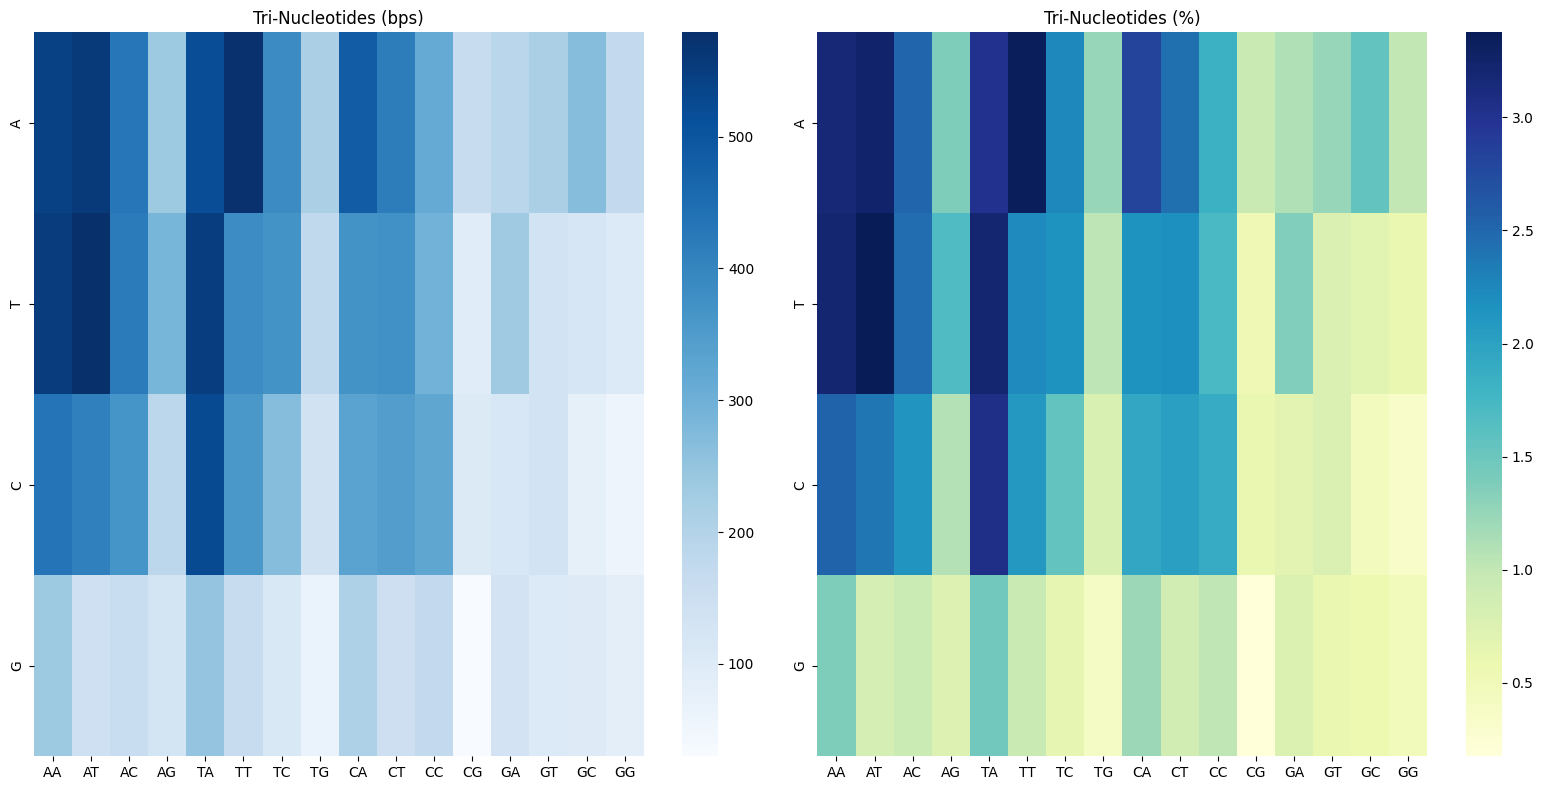

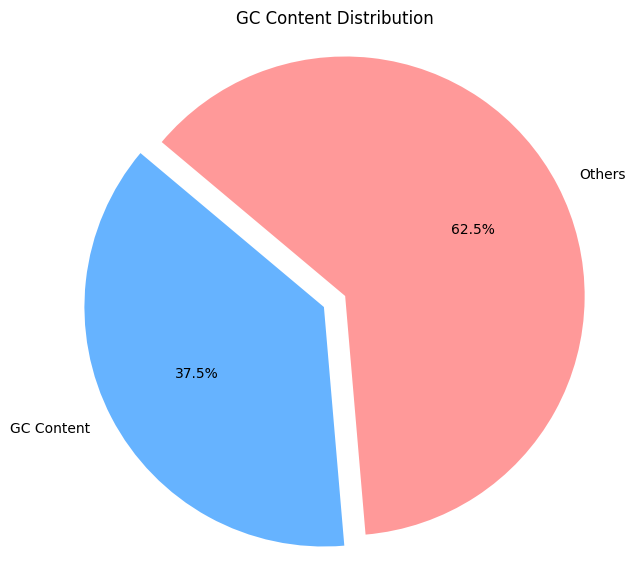

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. نمودار میله‌ای برای نوکلئوتیدهای ساده
def plot_simple_nucleotides(simple_matrix):
    simple_matrix.plot(kind='bar', figsize=(10, 5), legend=True)
    plt.title("Distribution of Mono-Nucleotides")
    plt.ylabel("Count / Percentage")
    plt.xlabel("Nucleotides")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 2. Heatmap برای دی‌نوکلئوتیدها
def plot_di_nucleotides_heatmap(matrix_bps, matrix_percentage, title_bps, title_percentage):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(matrix_bps, annot=True, fmt='d', cmap="Blues", ax=axes[0])
    axes[0].set_title(title_bps)

    sns.heatmap(matrix_percentage, annot=True, fmt='.2f', cmap="YlGnBu", ax=axes[1])
    axes[1].set_title(title_percentage)

    plt.tight_layout()
    plt.show()

# 3. Heatmap برای تری‌نوکلئوتیدها
def plot_tri_nucleotides_heatmap(matrix_bps, matrix_percentage, title_bps, title_percentage):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.heatmap(matrix_bps, annot=False, cmap="Blues", ax=axes[0])
    axes[0].set_title(title_bps)

    sns.heatmap(matrix_percentage, annot=False, cmap="YlGnBu", ax=axes[1])
    axes[1].set_title(title_percentage)

    plt.tight_layout()
    plt.show()

# 4. نمودار دایره‌ای برای درصد GC
def plot_gc_content(gc_content):
    labels = ['GC Content', 'Others']
    sizes = [gc_content, 100 - gc_content]
    colors = ['#66b3ff', '#ff9999']
    explode = (0.1, 0)  # explode GC content slice

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("GC Content Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# رسم نمودارها
plot_simple_nucleotides(simple_matrix)
plot_di_nucleotides_heatmap(di_matrix_bps, di_matrix_percentage, "Di-Nucleotides (bps)", "Di-Nucleotides (%)")
plot_tri_nucleotides_heatmap(tri_matrix_bps, tri_matrix_percentage, "Tri-Nucleotides (bps)", "Tri-Nucleotides (%)")
plot_gc_content(gc_content)
